### What is Coronavirus

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC
This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

### Define the Problem

Coronaviruses are a large family of viruses that are common in many different species of animals, including camels, cattle, cats, and bats. Rarely, animal coronaviruses can infect people and then spread between people such as with MERS, SARS, and now with 2019-nCoV.
Outbreaks of novel virus infections among people are always of public health concern. The risk from these outbreaks depends on characteristics of the virus, including whether and how well it spreads between people, the severity of resulting illness, and the medical or other measures available to control the impact of the virus (for example, vaccine or treatment medications).

This is a very serious public health threat. The fact that this virus has caused severe illness and sustained person-to-person spread in China is concerning, but it’s unclear how the situation in the United States will unfold at this time.

The risk to individuals is dependent on exposure. At this time, some people will have an increased risk of infection, for example healthcare workers caring for 2019-nCoV patients and other close contacts. For the general American public, who are unlikely to be exposed to this virus, the immediate health risk from 2019-nCoV is considered low. The goal of the ongoing U.S. public health response is to prevent sustained spread of 2019-nCov in this country.

### Precautions

Health authorities and scientists say the same precautions against other viral illnesses can be used: wash your hands frequently, cover up your coughs, try not to touch your face. And anyone who does come down with the virus should be placed in isolation. "Considering that substantial numbers of patients with SARS and MERS were infected in health-care settings", precautions need to be taken to prevent that happening again, the Chinese team warned in The Lancet.


### Coronovirus Exploratory Data Analysis
We can explore the analysis of the corono virus affected stats

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


The data source is from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [2]:
nCov_df = pd.read_csv('2019_nCoV_data.csv')

In [3]:
nCov_df.columns

Index(['Sno', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

### Column Description
2019_ncov_data.csv

Sno - Serial number 

Date - Date and time of the observation in MM/DD/YYYY HH:MM:SS

Province / State - Province or state of the observation (Could be empty when missing)

Country - Country of observation

Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised currently. So please clean them before using it)

Confirmed - Number of confirmed cases

Deaths - Number of deaths

Recovered - Number of recovered cases

The sample data are given below

In [4]:
nCov_df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [4]:
nCov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
Sno               1199 non-null int64
Date              1199 non-null object
Province/State    888 non-null object
Country           1199 non-null object
Last Update       1199 non-null object
Confirmed         1199 non-null float64
Deaths            1199 non-null float64
Recovered         1199 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 75.0+ KB


Based on the above information ,The Province/State having some missing values

In [5]:
nCov_df.describe()

,Sno,Confirmed,Deaths,Recovered
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,600.000000,276.213511,5.961635,14.617181
std,346.265794,1966.264622,58.082724,103.959136
min,1.000000,0.000000,0.000000,0.000000
25%,300.500000,2.000000,0.000000,0.000000
50%,600.000000,10.000000,0.000000,0.000000
75%,899.500000,82.000000,0.000000,2.000000
max,1199.000000,31728.000000,974.000000,2222.000000


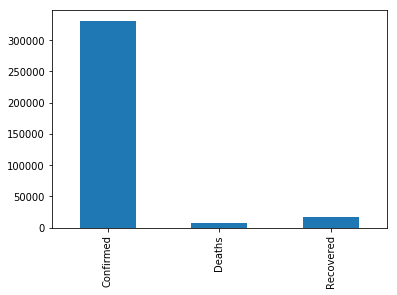

In [8]:
nCov_df[['Confirmed', 'Deaths', 'Recovered']].sum().plot(kind='bar')



### Observations
1. The dataset is contains many countries like China, Japan, US, India and so on.
2. The comparision of confirmed with Recovered, It clearly states that the recovery action from virsu is dead slow.
3. The data clearly indicating the spreadness of virus is so fast with out any control


In [6]:
nCov_df.columns

Index(['Sno', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

### Data Clean up

In [7]:
nCov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
Sno               1199 non-null int64
Date              1199 non-null object
Province/State    888 non-null object
Country           1199 non-null object
Last Update       1199 non-null object
Confirmed         1199 non-null float64
Deaths            1199 non-null float64
Recovered         1199 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 75.0+ KB


##### Removing the unwanted columns from tha data

In [9]:
nCov_df.drop(['Sno', 'Last Update'], axis=1, inplace=True)

In [10]:
nCov_df.columns

Index(['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

##### Converted the date data type object into datetime

In [11]:
nCov_df['Date'] = nCov_df['Date'].apply(pd.to_datetime)

In [12]:
nCov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 6 columns):
Date              1199 non-null datetime64[ns]
Province/State    888 non-null object
Country           1199 non-null object
Confirmed         1199 non-null float64
Deaths            1199 non-null float64
Recovered         1199 non-null float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 56.3+ KB


In [13]:
nCov_df['Date'].head()

0   2020-01-22 12:00:00
1   2020-01-22 12:00:00
2   2020-01-22 12:00:00
3   2020-01-22 12:00:00
4   2020-01-22 12:00:00
Name: Date, dtype: datetime64[ns]

In [14]:
nCov_df[nCov_df['Province/State'] == 'Hong Kong']

,Date,Province/State,Country,Confirmed,Deaths,Recovered
12,2020-01-22 12:00:00,Hong Kong,China,0.0,0.0,0.0
50,2020-01-23 12:00:00,Hong Kong,Hong Kong,2.0,0.0,0.0
108,2020-01-24 12:00:00,Hong Kong,Hong Kong,2.0,0.0,0.0
150,2020-01-25 22:00:00,Hong Kong,Hong Kong,5.0,0.0,0.0
193,2020-01-26 23:00:00,Hong Kong,Hong Kong,8.0,0.0,0.0
241,2020-01-27 20:30:00,Hong Kong,Hong Kong,8.0,0.0,0.0
296,2020-01-28 23:00:00,Hong Kong,Hong Kong,8.0,0.0,0.0
348,2020-01-29 21:00:00,Hong Kong,Hong Kong,10.0,0.0,0.0
404,2020-01-30 21:30:00,Hong Kong,Hong Kong,12.0,0.0,0.0
463,2020-01-31 19:00:00,Hong Kong,Hong Kong,13.0,0.0,0.0


##### Replacing the wrongly mapped country value towards states

In [15]:
nCov_df[nCov_df['Province/State'] == 'Taiwan']['Country'] = 'Taiwan'
nCov_df[nCov_df['Province/State'] == 'Hong Kong']['Country'] = 'Hong Kong'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
nCov_df['Country'].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium',
       'Others'], dtype=object)

In [18]:
nCov_df.replace({'Country': 'Mainland China'}, 'China', inplace=True)


#### Listing all the countries which is affected with corono virus

In [21]:
nCov_df['Country'].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong',
       'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal',
       'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany',
       'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden',
       'Russia', 'Spain', 'UK', 'Belgium', 'Others'], dtype=object)

### Country based virus affected people information

In [22]:
nCov_df.columns

Index(['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [27]:
nCov_df.groupby(['Country']).Confirmed.count().reset_index().sort_values(['Country'], ascending = True)

,Country,Confirmed
0,Australia,56
1,Belgium,7
2,Brazil,1
3,Cambodia,15
4,Canada,38
5,China,618
6,Finland,13
7,France,18
8,Germany,15
9,Hong Kong,19


#### Top most Severely affected countries

In [28]:
nCov_df.groupby(['Country']).Confirmed.count().reset_index().sort_values(['Confirmed'], ascending=False).head(10)

,Country,Confirmed
5,China,618
29,US,113
0,Australia,56
4,Canada,38
13,Japan,20
27,Thailand,20
22,South Korea,20
26,Taiwan,19
21,Singapore,19
14,Macau,19


##### List all the Provinces/States that were affected with Virus



In [29]:
nCov_df.columns

Index(['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [30]:
nCov_df['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'Bavaria', 'British Columbia',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'Toronto, ON', 'San Benito, CA', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship'],
      dtype=object)

##### Impact in india

In [31]:
nCov_df[nCov_df.Country == 'India']


,Date,Province/State,Country,Confirmed,Deaths,Recovered
432,2020-01-30 21:30:00,NaN,India,1.0,0.0,0.0
491,2020-01-31 19:00:00,NaN,India,1.0,0.0,0.0
552,2020-02-01 23:00:00,NaN,India,1.0,0.0,0.0
611,2020-02-02 21:00:00,NaN,India,2.0,0.0,0.0
675,2020-02-03 21:40:00,NaN,India,3.0,0.0,0.0
745,2020-02-04 22:00:00,NaN,India,3.0,0.0,0.0
815,2020-02-05 12:20:00,NaN,India,3.0,0.0,0.0
885,2020-02-06 20:05:00,NaN,India,3.0,0.0,0.0
958,2020-02-07 20:24:00,NaN,India,3.0,0.0,0.0
1030,2020-02-08 23:04:00,NaN,India,3.0,0.0,0.0


### Exploratory Analysis

#### Country most affected

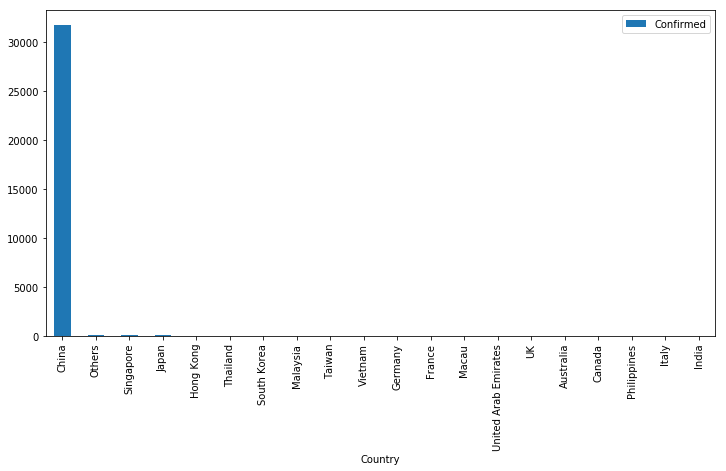

In [39]:
nCov_df.groupby(['Country']).Confirmed.max().reset_index().sort_values(['Confirmed'], ascending=False).head(20).plot(x='Country',
                                                                                                                      kind='bar', figsize=(12,6))

#### Country most recovered


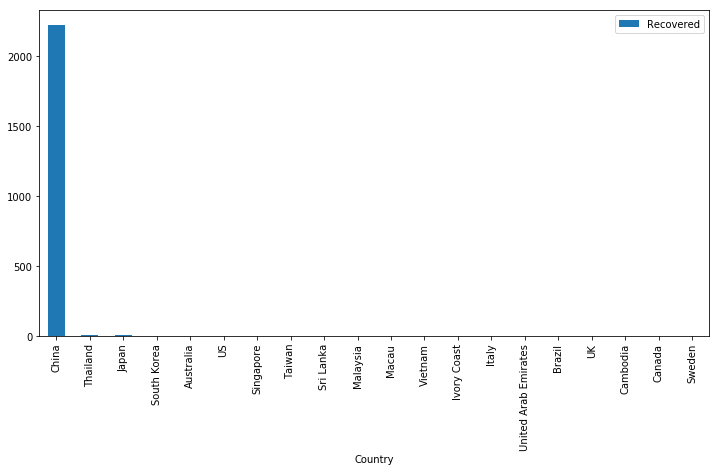

In [40]:
nCov_df.groupby(['Country']).Recovered.max().reset_index().sort_values(['Recovered'], ascending=False).head(20).plot(x='Country',
                                                                                                                      kind='bar', figsize=(12,6))

#### Country faced more deaths over the world

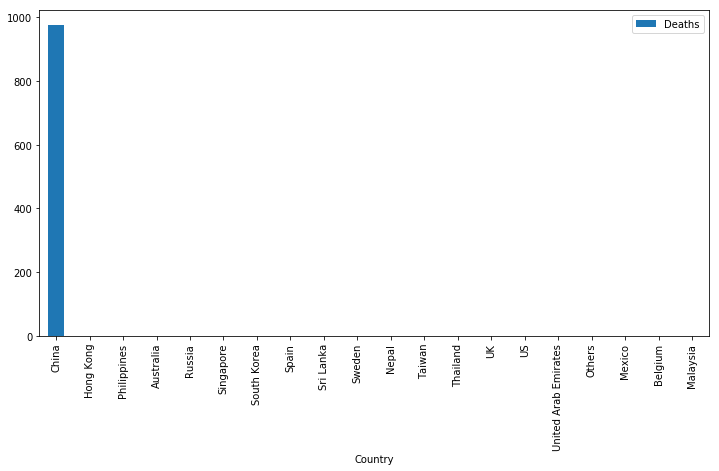

In [45]:
nCov_df.groupby(['Country']).Deaths.max().reset_index().sort_values(['Deaths'], ascending=False).head(20).plot(x='Country',
                                                                                                                      kind='bar', figsize=(12,6))

### Recovery vs Deaths in world wide

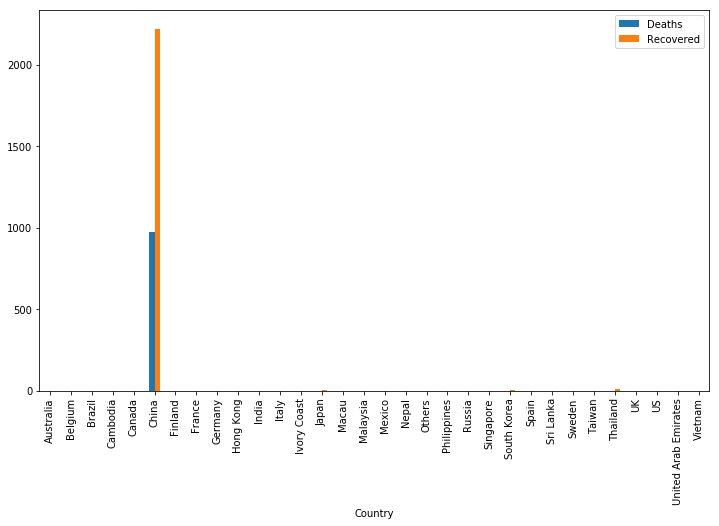

In [69]:
nCov_df[['Country', 'Deaths', 'Recovered']].groupby('Country').max().plot(kind='bar', figsize=(12, 7))

### Recovery vs Deaths in world wide other than China

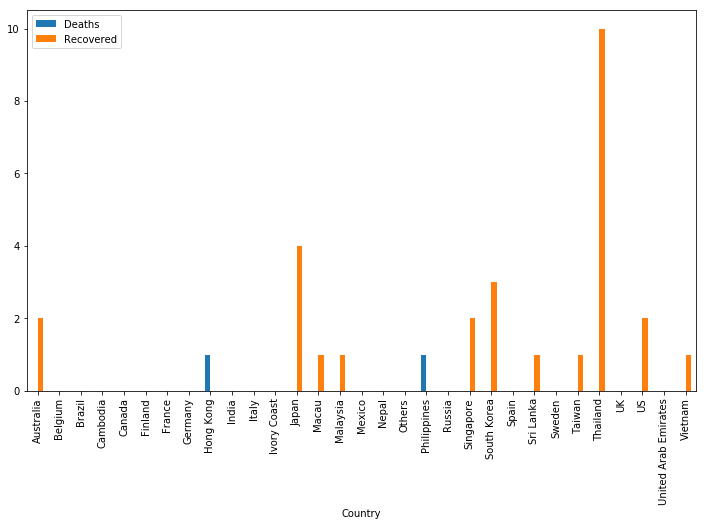

In [70]:
nCov_df[nCov_df['Country'] != 'China'][['Country', 'Deaths', 'Recovered']].groupby('Country').max().plot(kind='bar', figsize=(12, 7))

In [73]:
nCov_df['Country'].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong',
       'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal',
       'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany',
       'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden',
       'Russia', 'Spain', 'UK', 'Belgium', 'Others'], dtype=object)

#### Philippines clearly show that the no recovered happen

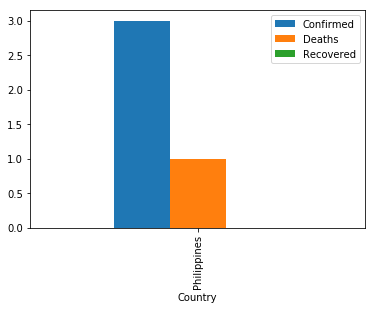

In [80]:
nCov_df[nCov_df['Country'] == 'Philippines'][['Country', 'Confirmed', 'Deaths', 'Recovered']].groupby('Country').max().plot(kind='bar')

#### When did Virus Confirmed initially?

In [43]:
nCov_df['Date'].min()

Timestamp('2020-01-22 12:00:00')

#### When was the Virus Confirmed recently?

In [46]:
nCov_df['Date'].max()

Timestamp('2020-02-10 19:30:00')

#### How many total no.of persons were identified with Virus on each day



In [47]:
nCov_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].max().reset_index()


,Date,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,444.0,0.0,0.0
1,2020-01-23 12:00:00,444.0,17.0,28.0
2,2020-01-24 12:00:00,549.0,24.0,31.0
3,2020-01-25 22:00:00,1052.0,52.0,42.0
4,2020-01-26 23:00:00,1423.0,76.0,44.0
5,2020-01-27 20:30:00,2714.0,100.0,47.0
6,2020-01-28 23:00:00,3554.0,125.0,80.0
7,2020-01-29 21:00:00,4586.0,162.0,90.0
8,2020-01-30 21:30:00,5806.0,204.0,116.0
9,2020-01-31 19:00:00,7153.0,249.0,169.0


#### Case confirmed for each countries

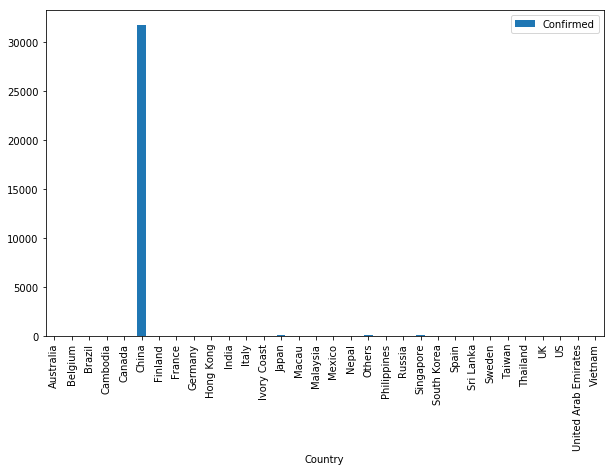

In [58]:
nCov_df.groupby(['Country']).Confirmed.max().reset_index().plot(x='Country', kind='bar', figsize=(10,6))

#### Case confirmed other than China

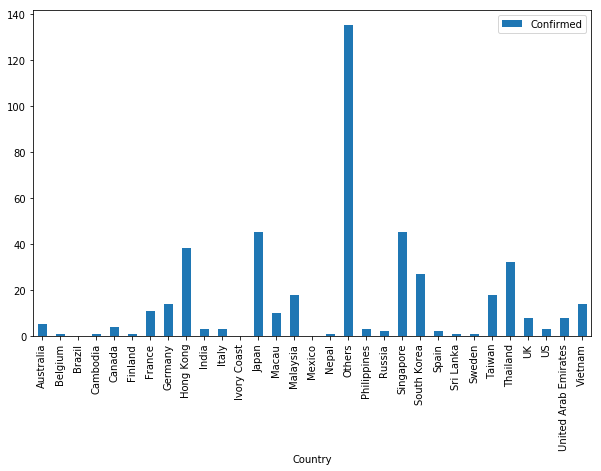

In [60]:
nCov_df[nCov_df['Country'] != 'China'].groupby(['Country']).Confirmed.max().reset_index().plot(x='Country', kind='bar', figsize=(10,6))

### The virus spreadness over the confirmed, Deaths and Recovered in globally

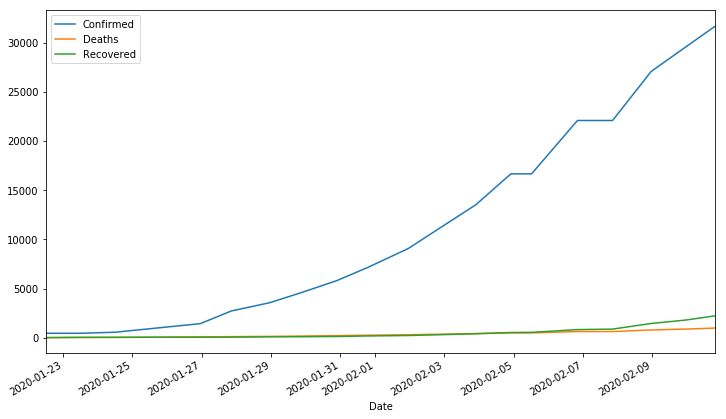

In [61]:
nCov_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].max().reset_index().plot(x='Date',
                                                                                      y=['Confirmed', 'Deaths', 'Recovered'],
                                                                                      figsize=(12, 7))


#### Spreadness of virus , Deaths and recovery data other than China

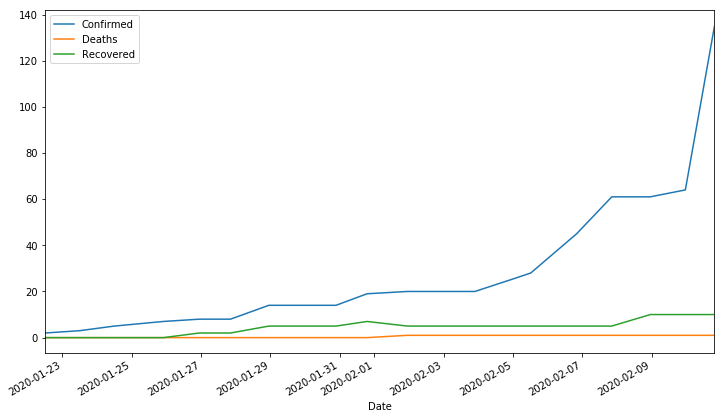

In [62]:
nCov_df[nCov_df['Country'] != 'China'].groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].max().reset_index().plot(x='Date',
                                                                                      y=['Confirmed', 'Deaths', 'Recovered'],
                                                                                      figsize=(12, 7))


#### List the States in China which were affected



In [63]:
nCov_df.columns

Index(['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

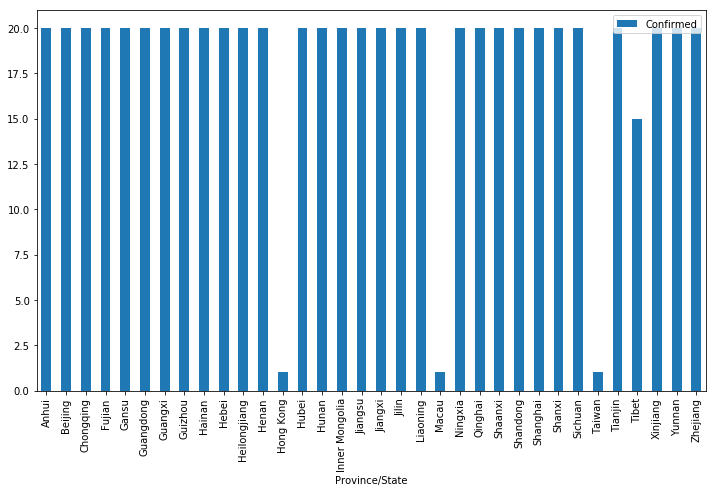

In [66]:
nCov_df[nCov_df['Country'] == 'China'].groupby('Province/State')[['Confirmed']].count().reset_index().plot(x='Province/State',
                                                                                      y=['Confirmed'],kind='bar',
                                                                                      figsize=(12, 7))


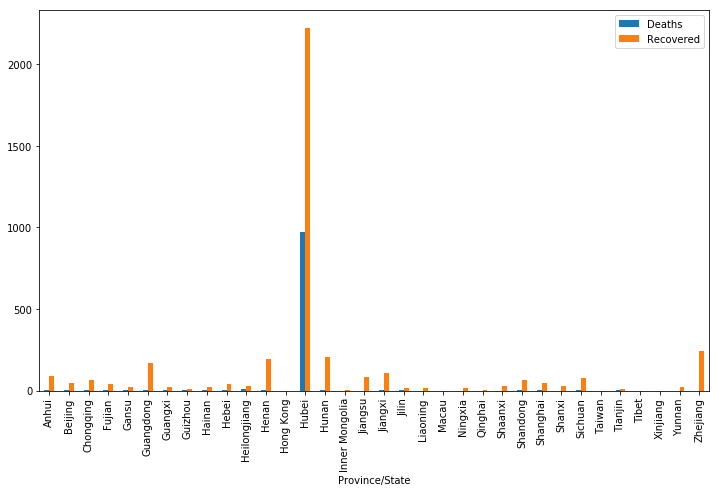

In [68]:
nCov_df[nCov_df.Country == 'China'][['Province/State', 'Deaths', 'Recovered']].groupby('Province/State').max().plot(kind='bar',
                                                                                                                   figsize=(12, 7))

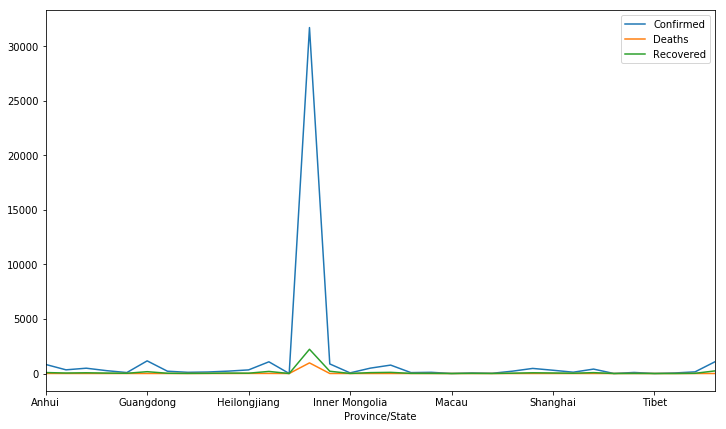

In [65]:
nCov_df[nCov_df['Country'] == 'China'].groupby('Province/State')[['Confirmed', 'Deaths', 'Recovered']].max().reset_index().plot(x='Province/State',
                                                                                      y=['Confirmed', 'Deaths', 'Recovered'],
                                                                                      figsize=(12, 7))


In [81]:
nCov_df.columns

Index(['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

#### Countries those have worst recovery services 

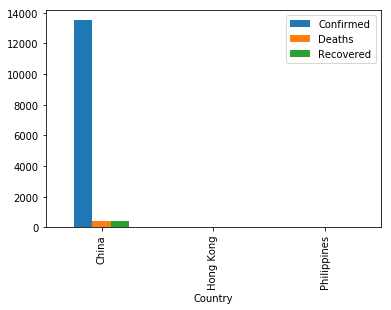

In [87]:
nCov_df[nCov_df['Recovered'] < nCov_df['Deaths']][['Country', 'Confirmed', 'Deaths', 'Recovered']].groupby('Country').max().plot(kind='bar')

#### Countries death rate high and 0 recovery rate

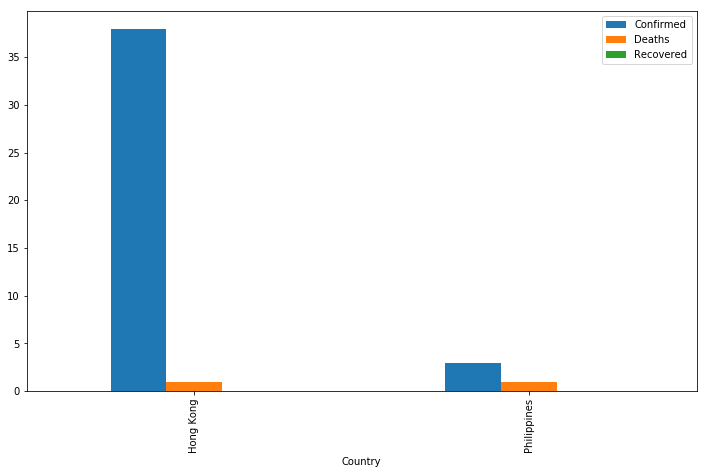

In [98]:
nCov_df[(nCov_df['Recovered'] < nCov_df['Deaths'])&(nCov_df['Country'] != 'China')][['Country', 'Confirmed', 'Deaths', 'Recovered']].groupby('Country').max().plot(kind='bar',
figsize=(12,7))

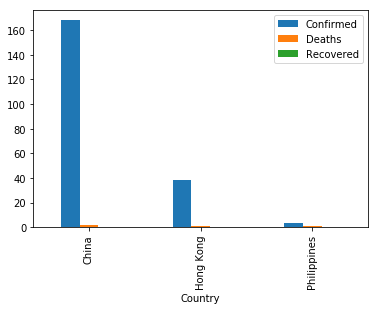

In [89]:
nCov_df[(nCov_df['Recovered'] == 0 )&( nCov_df['Deaths'] != 0)][['Country', 'Confirmed', 'Deaths', 'Recovered']].groupby('Country').max().plot(kind='bar')

#### Very slow recovery in china

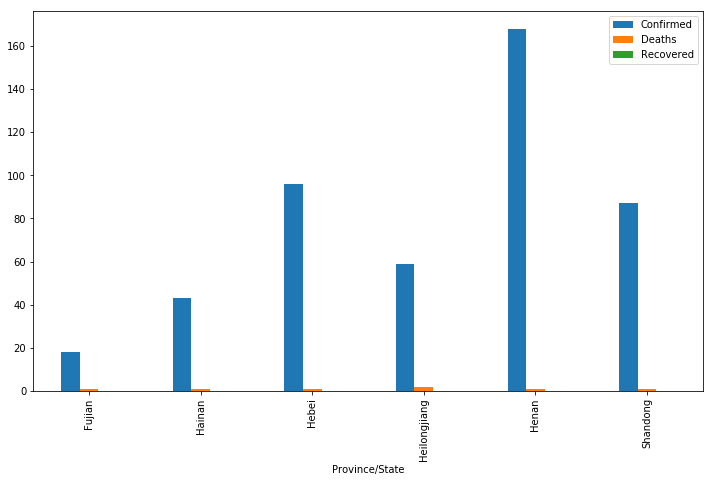

In [99]:
nCov_df[(nCov_df['Country'] == 'China') & (nCov_df['Recovered'] == 0 )&( nCov_df['Deaths'] != 0)][['Province/State', 'Confirmed', 'Deaths', 'Recovered']].groupby('Province/State').max().plot(kind='bar',
figsize=(12, 7))